In [6]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../howpop_train.csv")
df.shape

(134137, 17)

In [7]:
df.head(3).T

,0,1,2
url,https://habrahabr.ru/post/18284/,https://habrahabr.ru/post/18285/,https://habrahabr.ru/post/18286/
domain,habrahabr.ru,habrahabr.ru,habrahabr.ru
post_id,18284,18285,18286
published,2008-01-01 18:19:00,2008-01-01 18:30:00,2008-01-01 18:34:00
author,@Tapac,@DezmASter,@DezmASter
flow,develop,design,design
polling,False,False,False
content_len,4305,7344,8431
title,Новогодний подарок блоггерам — WordPress 2.3.2,"Сумасшедшие яйца, или сервис для отслеживания ...","Сумасшедшие яйца, или сервис для отслеживания ..."
comments,0,1,47


In [8]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
)  # избавляет от необходимости сохранять датасет

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
post_id,134137.0,181307.054265,81766.350702,18284.0,115565.0,182666.0,257401.0,314088.0
content_len,134137.0,7516.929699,8724.771640,1.0,2179.0,4949.0,9858.0,352471.0
comments,134137.0,39.625994,62.398958,0.0,7.0,19.0,48.0,2266.0
favs,134137.0,71.999866,145.854135,0.0,8.0,27.0,78.0,8718.0
views,134137.0,16631.013084,31479.819691,3.0,2100.0,7600.0,18700.0,1730000.0
votes_plus,133566.0,35.536888,42.461073,0.0,11.0,22.0,45.0,1466.0
votes_minus,133566.0,8.050035,11.398282,0.0,2.0,5.0,10.0,445.0


In [10]:
df.describe(include=["object", "bool"]).T  # бинарные и категориальные переменные

,count,unique,top,freq
url,134137,134137,https://habrahabr.ru/post/194800/,1
domain,134137,2,habrahabr.ru,97048
published,134137,130291,2011-06-14 15:52:00,39
author,97657,22077,@alizar,5292
flow,97048,6,develop,53318
polling,134137,2,False,129412
title,134137,133628,"Интересные события, произошедшие в выходные",56


In [11]:
# настройка внешнего вида графиков в seaborn
sns.set_style("dark")
sns.set_palette("RdBu")
sns.set_context(
    "paper", font_scale=1, rc={"figure.figsize": (120, 40), "axes.titlesize": 18}
)

In [12]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)

object
datetime64[ns]


In [13]:
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

1. В каком месяце (и какого года) было больше всего публикаций?
- март 2016

- март 2015

- апрель 2015

- апрель 2016

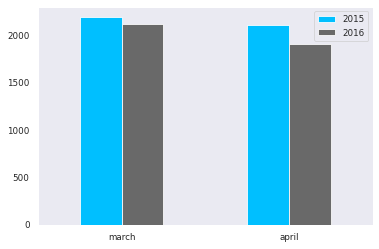

In [14]:
all = df['mon_yr'] = [str(p)[:7] for p in df.published]
needed = (df.mon_yr.value_counts()[:10])
#print(needed)

twentyfifteen = [needed[0], needed[3]]
twentysixteen = [needed[1], needed[9]]

graph = pd.DataFrame({"2015": twentyfifteen, "2016": twentysixteen}, index=['march', 'april'])
graph.plot.bar(color=["deepskyblue", "dimgrey"], rot=0);

2. Проанализируйте публикации в месяце из предыдущего вопроса

Выберите один или несколько вариантов:

  - Один или несколько дней сильно выделяются из общей картины (yes)

  - На хабре всегда больше статей, чем на гиктаймсе (no)

  - По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей (yes)

  Подсказки: постройте график зависимости числа публикаций от дня; используйте параметр hue; не заморачивайтесь сильно с ответами и не ищите скрытого смысла :)

/tmp/ipykernel_96558/1428442545.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_popmonth['day'] = [p.day for p in df_popmonth.published]


<AxesSubplot:xlabel='day', ylabel='count'>

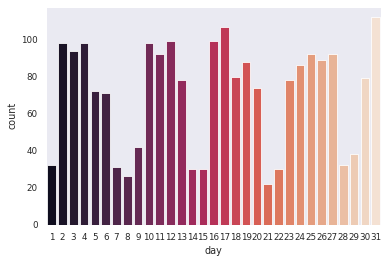

In [15]:
pokemon = needed.index[0]
df_popmonth = df[df.mon_yr == pokemon]
df_popmonth['day'] = [p.day for p in df_popmonth.published]
sns.countplot(x = 'day', data = df_popmonth, palette="rocket")

<AxesSubplot:xlabel='day', ylabel='count'>

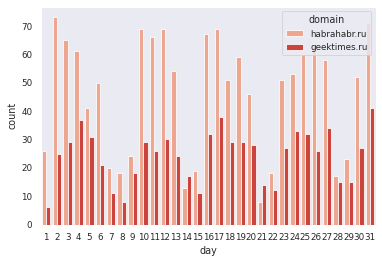

In [16]:
sns.countplot(x = 'day', hue="domain", data = df_popmonth, palette="Reds")

<AxesSubplot:xlabel='dayofweek', ylabel='count'>

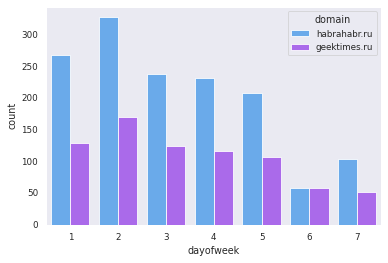

In [17]:
sns.countplot(x = 'dayofweek', hue="domain", data = df_popmonth, palette="cool")

3. Когда лучше всего публиковать статью?

- На хабре дневные статьи комментируют чаще, чем вечерние (нет)

- Больше всего просмотров набирают статьи, опубликованные в 12 часов дня (нет)

- Больше всего просмотров набирают статьи, опубликованные в 6 часов утра (да)

<AxesSubplot:title={'center':'average number of views by hour'}, xlabel='hour'>

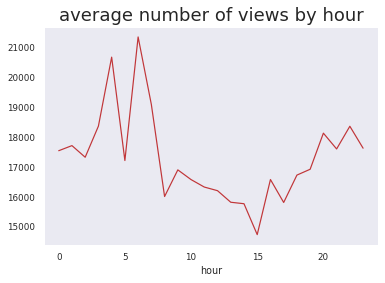

In [18]:
#just_the_time = [str(p)[11:][:2] for p in df.published]

#sns.countplot(x = 'hour', hue = 'domain', data = df, palette="Set2")

df.groupby('hour')['views'].mean().plot(title="average number of views by hour")

- У опубликованных в 10 утра постов больше всего комментариев (нет)

hour
4    53.657273
3    53.123877
6    51.799618
1    49.417910
2    48.827025
Name: comments, dtype: float64


<AxesSubplot:title={'center':'number of comments by hour'}, xlabel='hour'>

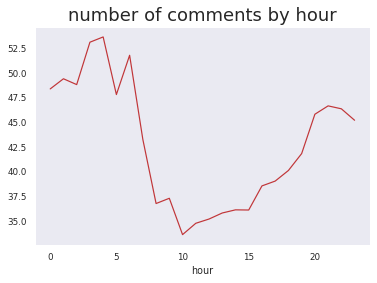

In [19]:
av_comm_by_hour = df.groupby('hour')['comments'].mean()
print(av_comm_by_hour.sort_values(ascending=False)[:5])
av_comm_by_hour.plot(title = "number of comments by hour")

- Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера (нет)

In [20]:
gt = df[df.domain == 'geektimes.ru']
gt_max_comm = df[(df.domain == 'geektimes.ru') & (df.comments == df.comments.max())]
print(gt_max_comm.published)

38763   2011-07-01 02:35:00
Name: published, dtype: datetime64[ns]


<AxesSubplot:title={'center':'average number of habr comments by hour'}, xlabel='hour'>

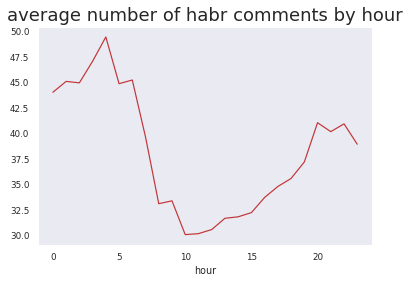

In [21]:
df[df.domain == 'habrahabr.ru'].groupby('hour')['comments'].mean().plot(title="average number of habr comments by hour")

4. Кого из топ авторов чаще всего минусуют?

- @Mordatyj

- **@Mithgol**

- @alizar

- @ilya42

In [22]:
df[df.author.isin(['@Mordatyj', '@Mithgol', '@alizar', '@ilya42'])].groupby('author')[['votes_minus']].mean().sort_values('votes_minus', ascending = False)

,votes_minus
author,
@Mithgol,20.481081
@alizar,7.928191
@Mordatyj,7.471455
@ilya42,6.216797


5. Сравните субботы и понедельники

Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

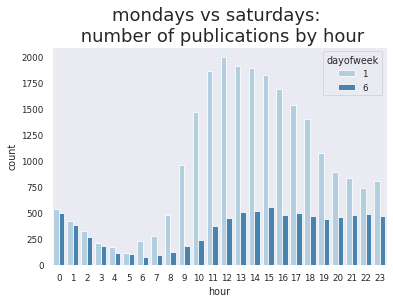

In [23]:
g = sns.countplot(x = 'hour', hue = 'dayofweek', data = df[df.dayofweek.isin([1, 6])], palette="Blues");
g.set_title("mondays vs saturdays: \n number of publications by hour");